<a href="https://colab.research.google.com/github/aonekoda/ml_one_day/blob/main/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-겹 교차 검증을 사용한 모델 성능 평가


훈련데이터의 일부를 Validation용을 분리하고 모형을 평가하는데 사용한다.

* **K-Fold Cross Validation** 은 데이터를 K개의 부분으로 나눈다
* K-1개의 폴드를 하나의 훈련셋으로 하여 훈련하고 남은 1개의 폴드를 테스트셋처럼 사용한다.
* K번 반복하여 얻은 모형의 성능을 평균하여 최종 성능을 산출한다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

유방암데이터를 사용한다. 

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### cross_val_score   
    * estimator : 검증하고자 하는 모형, 파이프라인
    * cv : 정수를 입력하면 기본 분할기의 폴드 수를 지정한다.
    * n_jobs : 사용 가능한 CPU 코어의 갯수 (-1이면 모두 사용)
    * scoring : "accuracy"가 기본, "recall","precision"등을 사용할 수 있다.

In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=model,  # 파이프라인 또는 모형
                         X=X,  # 특성값
                         y=y,  # 타겟값
                         cv=10,   # 10-Fold Cross validation
                         n_jobs=1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f' % np.mean(scores)) # 평균을 계산한다.

CV 정확도 점수: [0.94736842 0.9122807  0.92982456 0.94736842 0.96491228 0.98245614
 0.94736842 0.94736842 0.96491228 0.96428571]
CV 정확도: 0.951


# Learning Curve 학습 곡선을 사용한 모형의 평가

* learning_curve 함수를 사용. 
* 훈련 데이터셋의 샘플 갯수에 따른 영향을 평가하고자 한다.


In [6]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)


In [7]:
train_sizes

array([ 35,  71, 107, 143, 179, 214, 250, 286, 322, 358])

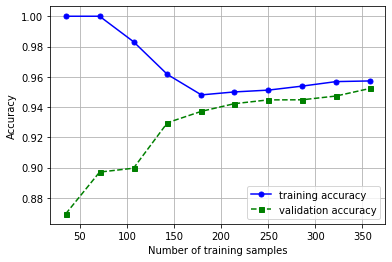

In [8]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



* train_sizes 파라미터를 통행 훈련세트의 비율을 0.1에서 1.0 사이로 총 10개를 생성
* cv 파라미터를 통해 10-fold CV를 설정
* train 정확도와 validataion 정확도를 시각화
* train 데이터의 비율이 0.7(250개) 이상일 경우에 모형의 성능이 좋다.



#  Validation_Curve검증 곡선으로 모형 평가하기


* 일부 하이퍼 파라미터 값을 변경할 때 모형의 성능 변화를 평가하고자 한다.
* validation_curve 함수 사용
    * param_name : 변경할 하이퍼 파라미터의 이름
    * param_range : 사용할 하이퍼파라미터의 범위



In [9]:
from sklearn.model_selection import validation_curve

param_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores, test_scores = validation_curve(
                estimator=model, 
                X=X_train, 
                y=y_train, 
                param_name='C', # 로지스틱 회귀에서 규제
                param_range=param_range,
                cv=10)


In [10]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

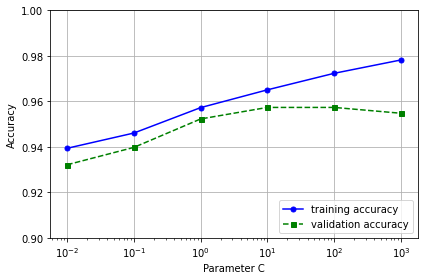

In [11]:

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.00])
plt.tight_layout()
plt.show()



* validation_curve 함수는 기본적으로 CV를 통해 성능을 추정한다.
* validation_curve 함수 안에서 평가하고자 하는 파라미터를 지정한다. 
* param_name='logisticregression__C' --> 이 경우에는 logisticregression 모형의 C 파라미터를 의미한다.
* C의 값을 높일수록 규제가 약해지고 조금 과대 적합되는 경향이 보인다. 
